**Статистическая гипотеза.** У вас есть [файл](https://pastebin.com/kzT57TSK) с данными о времени ответа утилиты ping. Сформулируйте гипотезу о распределении времени ответа. Протестируйте гипотезу с помощью любого известного вам критерия. Проинтерпретируйте результат.

In [ ]:
! if [ ! -e kzT57TSK.txt ]; then curl https://pastebin.com/raw/kzT57TSK --output kzT57TSK.txt; fi;
! pip install numpy matplotlib scipy

In [1]:
import re

import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ping_string_pattern = r"(?P<size>\d*) bytes from (?P<ip>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) \((?P=ip)\): icmp_seq=(?P<icmp_seq>\d*) ttl=(?P<ttl>\d*) time=(?P<time_ms>\d*\.\d) ms"
ping_str_regexp = re.compile(ping_string_pattern)

times = []

with open("kzT57TSK.txt") as f:
    for l in f:
        times.append(float(ping_str_regexp.search(l)['time_ms']))

Гипотеза: задержка имеет exponentiated Weibull distribution (основана на https://stats.stackexchange.com/a/1325)

Проверим гипотезу на уровне значимости $\alpha=0.05$ с помощью [Kolmogorov–Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test).

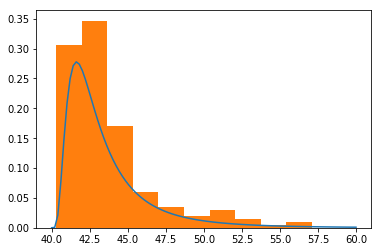

True


In [3]:
n = len(times)
dist = st.exponweib(*st.exponweib.fit(times))

x = np.linspace(40,60,100)
plt.plot(x, dist.pdf(x))
plt.hist(times, weights=(1/n,)*n)
plt.show()

print(st.kstest(times, dist.cdf).statistic < 1.36/np.sqrt(n))